# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a discriminative classifier used in binary classification.

In this kernel, I will first explain and visualize the mathematics/intuition behind SVM. Then I will go over the heart disease UCI dataset with SVM. In this tutorial, I will use the scikit-learn library, but I would strongly recommend implementing SVM yourself if you feel confident enough.

__Prerequisite:__ SVM is fairly accessible and doesn't require much advanced mathematics to understand the meat of it. Fundamental mathematics (Linear Algebra and Multivariable Calculus), basics of machine learning (overfitting, underfitting, classification,etc.) basics of Python are required. Basic ideas behind continuous optimization would be a big bonus.

First, we will import some necessary libraries

In [4]:
import numpy as np #For linear algebra
import pandas as pd #For data manipulation

%matplotlib inline
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #For visualization

from sklearn.svm import SVC #For SVM

from IPython.display import Image #For images

import warnings
warnings.filterwarnings('ignore')

For visualization, we will generate a simple 2-dimensional dataset.

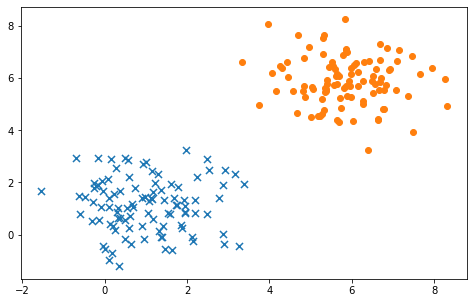

In [5]:
np.random.seed(0)
X1 = np.random.randn(100,2) + 1
X2 = np.random.randn(100,2) + 6
X = np.vstack((X1,X2))

y = np.vstack((np.ones((100,1)), -1*np.ones((100,1)))).ravel()

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X1[:,0],X1[:,1], marker='x', s=50)
ax.scatter(X2[:,0],X2[:,1])

plt.show()

Mathematically, when we are given a dataset, we say that we are given $(x^i,y^i)_{i=1}^n$ with $x^i\in \mathbb{R}^d$, $y^i\in \{-1,1\}$ for all $i$ where $n$ is number of instances in the dataset, $d$ is the dimension of the dataset, $x^i$ is the vector representing the $i^\text{th}$ instance and $y^i$ denotes the class of $x^i$. For the data we just generated above, we have $n=200$, $d=2$, $x^i$ is the $i^\text{th}$ row of $X$ and $y^i$ is the $i^\text{th}$ row of $y$.

In linear binary classification, when we are given such dataset, we want to find $w\in \mathbb{R}^d$ and $b\in \mathbb{R}$ such that $w^Tx^i + b > 0$ if $y^i = 1$ and $w^Tx^i + b < 0$ if $y^i = -1$ for all $i$. If that made no sense, basically, we want to find a hyperplane $w^Tx+b = 0$ that "divides" the two classes such that all instances of one class will be on one side of the hyperplane and all instances of the other class will be on the other side of the hyperplane. For example, in our 2-dimensional dataset above, our hyperplane would be a line. Hopefully it's easy to see that for our dataset, we can find infinitly many lines that perfectly divide the two classes. For any dataset, if it is possible to find a hyperplane that perfectly divide the two classes, then we say that dataset is linearly-separable.

As mentioned, in our dataset, we can find infinitely many hyperplane that can divide the two classes. This is also true in general for any linearly-separable datasets. Since clearly not all hyperplanes are equal, what would be the "optimal" hyperplane for us to use? Intuitively, we would want a hyperplane such that the distance from the hyperplane to the closest point of each class is maximized. This is the idea behind SVM a.k.a. Maximum Margin Classifier.

Hopefully it is clear from the figure below that the distance from a point $x^j$ from the hyperplane $w^Tx + b$ can be obtained by $\frac{|w^Tx^j + b|}{\|w\|}$. If not, remember that the distance to $x^j$ is simply the projection of $x^j-x^i$ (where $x^i$ is any arbitrary point on the hyperplane) in the direction of $w$.

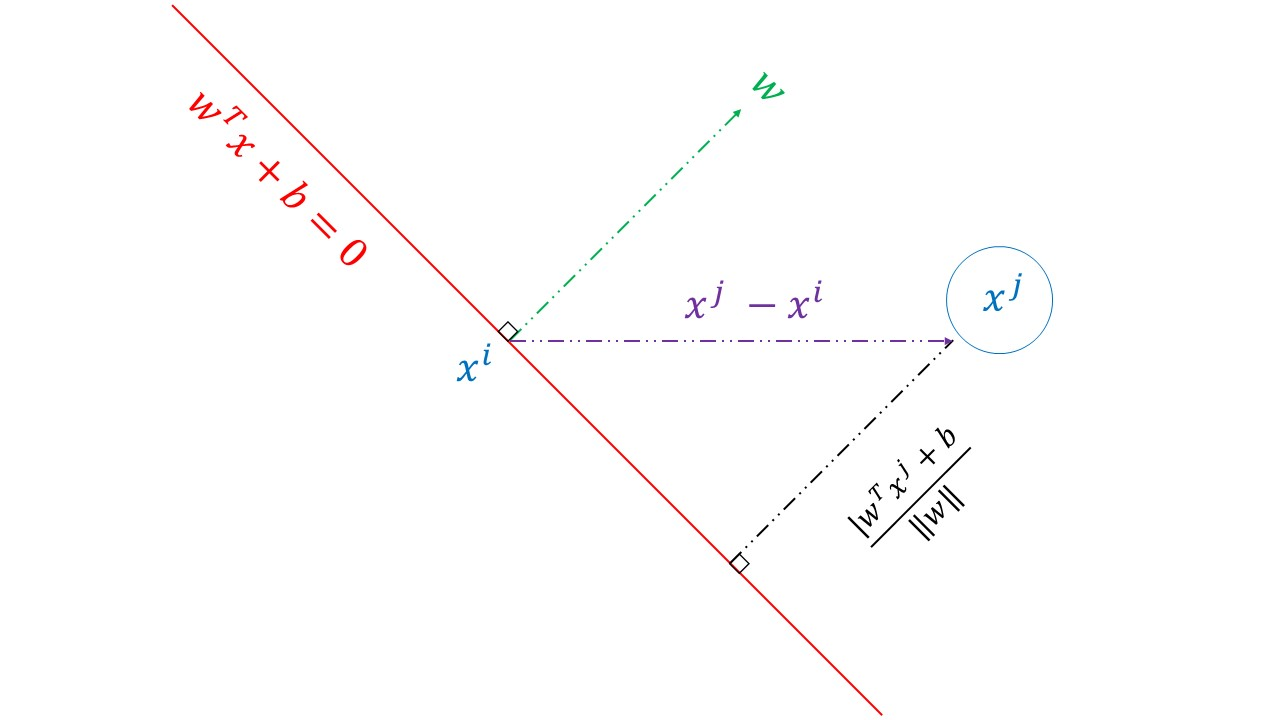

Note that a dataset is linearly-separable if and only if there exists a positive constant $a$ such that $w^Tx^i + b > a$ if $y^i = 1$ and  $w^Tx^i + b < -a$ if $y^i = -1$. We can always normalize $w$ and $b$ such that $a=1$. Let $w,b$ be the normalized optimal parameters such that the distance to each class is maximized and the above condition is satisfied. Let $x_i,x_j$ be the closest points of each class to the hyperplane $w^Tx+b = 0$ with $y^i = 1$ and $y^j = -1$. Then clearly, we have $w^Tx^i+b = 1$ and $w^Tx^j+b = -1$ (otherwise, $w$ and $b$ are not optimal). Points that lie on these two hyperplane are called support vectors.

Clearly, the distance between $w^Tx+b = 1$ and $w^Tx+b=-1$ can be obtained by $\frac{2}{\|w\|}$. Hence we want to maximize $\frac{2}{\|w\|}$, which is equivalent to minimizing $\frac{1}{2}\|w\|^2$. We also want to make sure that all the points are on the correct side of the hyperplane. Mathematically, we want to introduce the margin constraints $y^i(w^Tx^i+b) \geq 1$. The formulation of hard-margin SVM can be written as a quadratic programming problem as follows

\begin{equation}
    \begin{aligned}
        \min\limits_{w,b} \ &\frac{1}{2}\|w\|^2 \\
        \text{s.t.} \ &y^i(w^Tx^i+b) \geq 1 \ (i=1,\dots,n)
    \end{aligned}
\end{equation}

Note that while minimizing $\|w\|^2$ and minimizing $\|w\|$ are equivalent, it is simply much easier to work with $\|w\|^2$ mathematically.

In [6]:
# Function to visualize the decision boundary
def plot_SVM(X1,X2, support_vector=False, margin=False):
    plt.scatter(X1[:, 0], X1[:, 1], s=50, marker="x")
    plt.scatter(X2[:, 0], X2[:, 1], s=30)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    if margin:
        ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                   linestyles=['--', '-', '--'])
    else:
        ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
                   linestyles=['-'])
    
    # plot support vectors
    if support_vector:
        ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], 
                   s=100, linewidth=1, 
                   facecolors='none', edgecolors='k')

    plt.xlabel('$x_1$', fontsize=15)
    plt.ylabel('$x_2$', fontsize=15)
    
    plt.show()

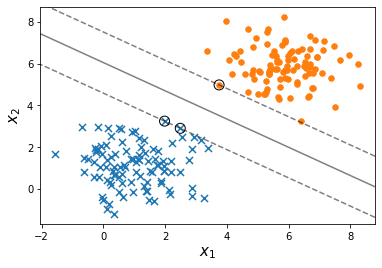

In [7]:
# clf is our classifier. Ignore the variable C and kernel for now
clf = SVC(C=10000, kernel='linear')
# fitting the model to our data
clf.fit(X,y)
#plotting the decision boundary
plot_SVM(X1,X2, support_vector=True, margin=True)

Unfortunately, when the dataset is not linearly-separable, the above problem becomes infeasible. What if we still want to "attempt" to classify the data even if it is not linearly-separable?

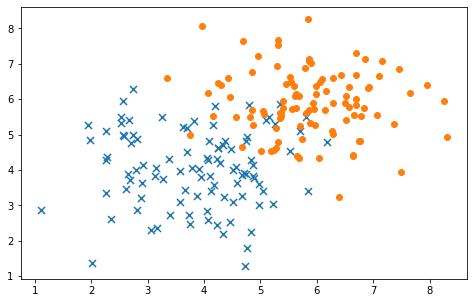

In [8]:
X1ns = np.random.randn(100,2) + 4
Xns = np.vstack((X1ns,X2))

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X1ns[:,0],X1ns[:,1], marker='x', s=50)
ax.scatter(X2[:,0],X2[:,1])

plt.show()

For the above dataset, it looks like we can still "draw" a hyperplane between the two classes. To deal with linearly-non-separable datasets like this, we can relax the margin constraints by introducing a loss function $L: \mathbb{R}^m \times \mathbb{R} \rightarrow \mathbb{R}_{\geq 0}$ where $L(x^i,y^i) = \max(0, 1 - y^i(w^Tx^i + b))$. Basically, it gives zero loss if the $i^\text{th}$ instance satisfies the margin constraint $y^i(w^Tx^i + b) \geq 1$ and positive loss otherwise. Note the loss is also proportional to how much that instance violates the margin constraint.

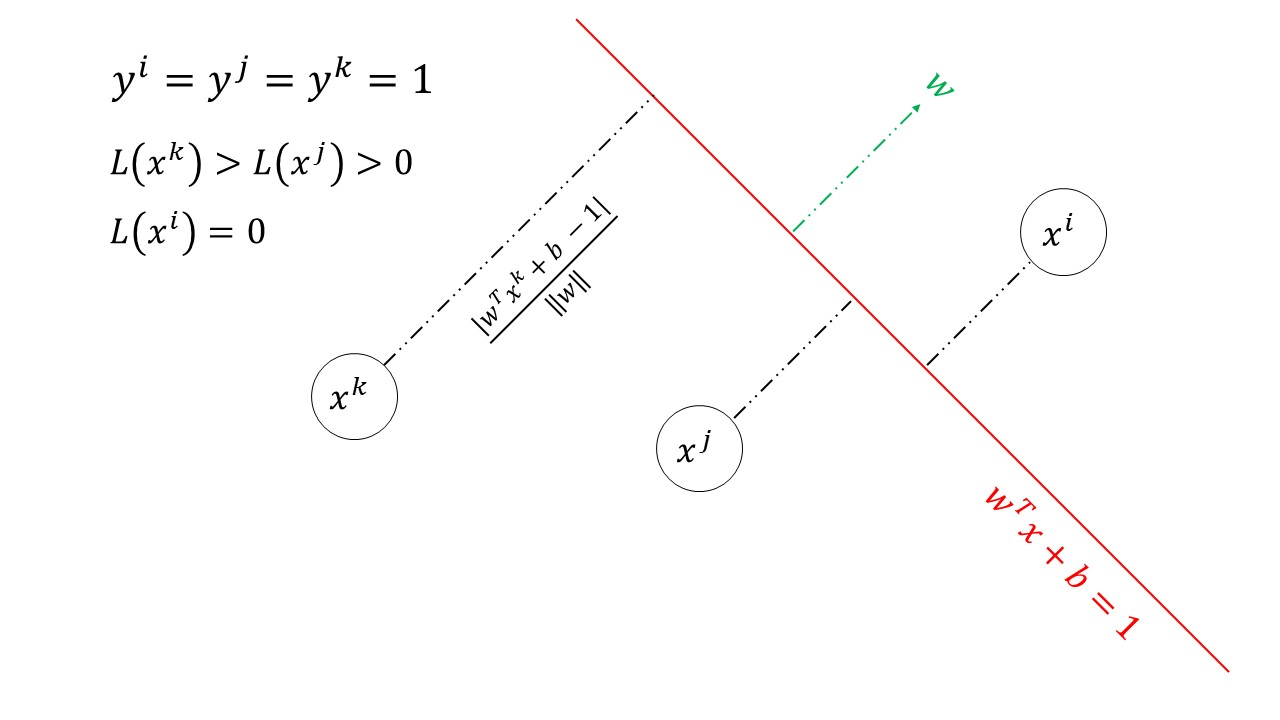

Soft-margin SVM can be formulated as an unconstrained optimization problem as follows

\begin{equation}
    \begin{aligned}
        \min\limits_{w,b} \frac{1}{2}\|w\|^2 + C \sum\limits_{i=1}^n L(x^i, y^i)
    \end{aligned}
\end{equation}

where $C$ is a regularization term. Introducing a slack variable $\xi \in \mathbb{R}^n$, the above problem is equivalent to the following problem.

\begin{equation}
    \begin{aligned}
        \min\limits_{w,b,\xi} &\frac{1}{2}\|w\|^2 + C\sum\limits_{i=1}^n\xi_i \\
        \text{s.t.} \ &y^i(w^Tx^i + b) \geq 1 - \xi_i \ (i=1,\dots, n) \\
                      &\xi_i \geq 0 \ (i=1,\dots,n)
    \end{aligned}
\end{equation}

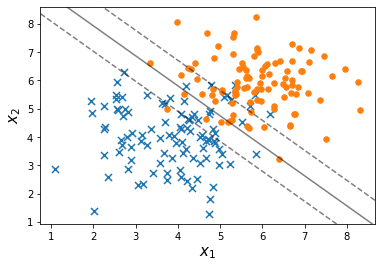

In [9]:
clf= SVC(C=1, kernel='linear')
clf.fit(Xns, y)
plot_SVM(X1ns, X2, margin=True)

As you can see above, even though the hyperplane cannot perfectly divide the two classes, it still does a good enough job.

Now let's go back to the regularization term $C$. Intuitively, $C$ is how much we want to "punish" the model for violating the margin constraint. A small enough $C$ can help preventing overfitting and vice-versa. Note that as $C\rightarrow \infty$, the soft-margin SVM becomes hard-margin SVM as the loss value will become too large to violate the constraint. Hence when dealing with linearly-separable datasets, with a large enough value for $C$, a soft-margin SVM will behave exactly like a hard-margin SVM. However, a small enough $C$ can help soft-margin SVM deal with outliers much better than soft-margin SVM as we can see with the following dataset.

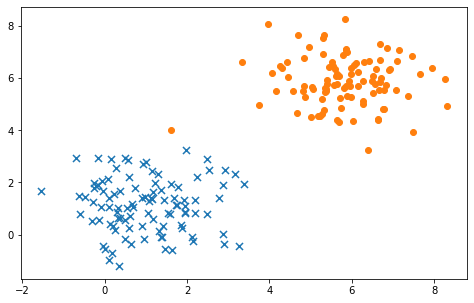

In [10]:
X2Out = np.vstack((X2,[1.6,4]))
yOut = np.vstack((np.ones((100,1)), -1*np.ones((101,1)))).ravel()
XOut = np.vstack((X1,X2Out))

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(X1[:,0],X1[:,1], marker='x', s=50)
ax.scatter(X2Out[:,0],X2Out[:,1])

plt.show()

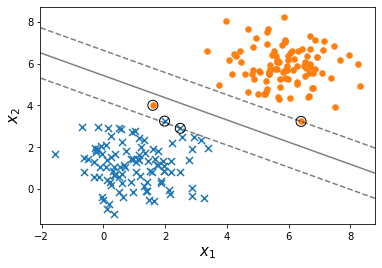

In [11]:
clf = SVC(C=1, kernel='linear')
clf.fit(XOut,yOut)
plot_SVM(X1,X2Out, support_vector=True, margin=True)

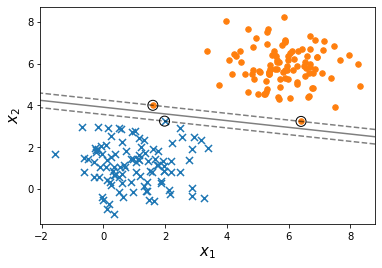

In [12]:
clf = SVC(C=10, kernel='linear')
clf.fit(XOut,yOut)
plot_SVM(X1,X2Out, support_vector=True, margin=True)

The second graph is clearly overfitting as it tries to make sure every single instance does not violate the margin constraint.

To classify unseen data $x$, we use the following decision function

$$
f(x) = \text{sign}(w^Tx+b)
$$

So far, we have only discussed linear classifier. What if we have the following dataset.

In [13]:
import math

inner_r = 5
outer_r = 10
ratio = inner_r/outer_r
X1nl = np.zeros((100,2))
X2nl = np.zeros((100,2))

np.random.seed(0)
for i in range(100):
    random_a = 2*math.pi*np.random.random()
    random_inner_r = inner_r*np.random.random()
    X1nl[i,0] = random_inner_r*math.cos(random_a)
    X1nl[i,1] = random_inner_r*math.sin(random_a)
    
    random_a = 2*math.pi*np.random.random()
    random_outer_r = outer_r*((1-ratio*1.5)*np.random.random()+ratio*1.5)
    X2nl[i,0] = random_outer_r*math.cos(random_a)
    X2nl[i,1] = random_outer_r*math.sin(random_a)

Xnl = np.vstack((X1nl,X2nl))
ynl = np.vstack((np.ones((100,1)), -1*np.ones((100,1)))).ravel()

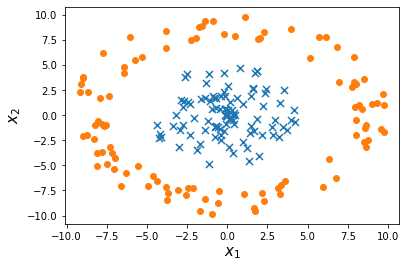

In [14]:
plt.scatter(X1nl[:,0], X1nl[:,1], s=50, marker="x")
plt.scatter(X2nl[:,0], X2nl[:,1])

plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

plt.show()

Clearly, no straight line would be sufficient (at least not in the original feature space). Let $\phi: \mathbb{R}^2 \rightarrow \mathbb{R}^3$ be a feature mapping such that $\phi(x) = \begin{bmatrix}x_1 \\ x_2 \\ x_1^2+x_2^2 \end{bmatrix}$. Our transformed feature space can be visualized as follows

In [15]:
X1_3D = np.hstack((X1nl, (np.power(X1nl[:,0],2) + np.power(X1nl[:,1],2)).reshape(X1nl.shape[0],1)))
X2_3D = np.hstack((X2nl, (np.power(X2nl[:,0],2) + np.power(X2nl[:,1],2)).reshape(X2nl.shape[0],1)))
X_3D = np.vstack((X1_3D, X2_3D))

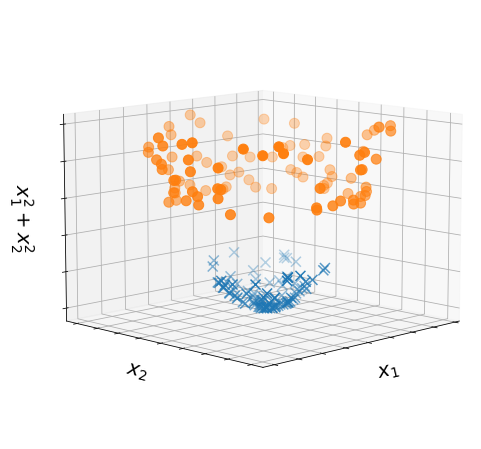

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.view_init(elev=10, azim=45)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_1^2+x_2^2$', fontsize=20)

ax.scatter(X1_3D[:,0], X1_3D[:,1], X1_3D[:,2], marker='x', s=100)
ax.scatter(X2_3D[:,0], X2_3D[:,1], X2_3D[:,2], s=100)

plt.show()

Hopefully it is easy to see that the dataset becomes linearly-separable in the new feature space. So instead of doing classification in the original feature space, we can do it in the transformed feature space. Which is equivalent to solving the following problem.

\begin{equation}
    \begin{aligned}
        \min\limits_{w,b,\xi} &\frac{1}{2}\|w\|^2 + C\sum\limits_{i=1}^n\xi_i \\
        \text{s.t.} \ &y^i(w^T\phi(x^i) + b) \geq 1 - \xi_i \ (i=1,\dots, n) \\
                      &\xi_i \geq 0 \ (i=1,\dots,n)
    \end{aligned}
\end{equation}

Note that instead of working with $x^i$, we are working with $\phi(x^i)$ so now we have $w \in \mathbb{R}^3$.

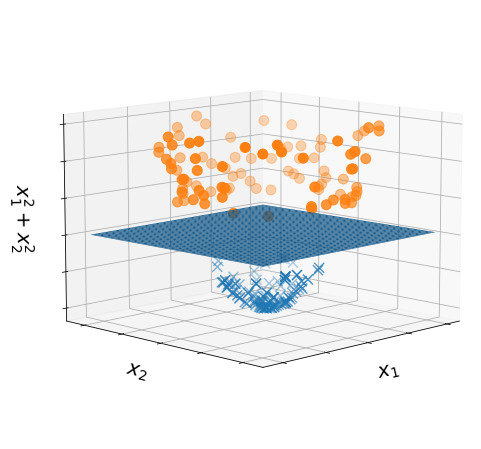

In [17]:
clf = SVC(C=1, kernel='linear')
clf.fit(X_3D, ynl)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

ax.view_init(elev=10, azim=45)

ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('$x_1^2+x_2^2$', fontsize=20)

ax.scatter(X1_3D[:,0], X1_3D[:,1], X1_3D[:,2], marker='x', s=100)
ax.scatter(X2_3D[:,0], X2_3D[:,1], X2_3D[:,2], s=100)

xlim = ax.get_xlim()
ylim = ax.get_ylim()

xp = np.linspace(xlim[0], xlim[1], 100)
yp = np.linspace(ylim[0], ylim[1], 100)
zp = np.linspace(0, xlim[1]**2+ylim[1]**2 , 100)

XP,YP = np.meshgrid(xp,yp)

Z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x-clf.coef_[0][1]*y) / clf.coef_[0][2]

ax.plot_surface(XP,YP, Z(XP,YP))

plt.show()

Plotting the decision boundary back into the original feature space, we have

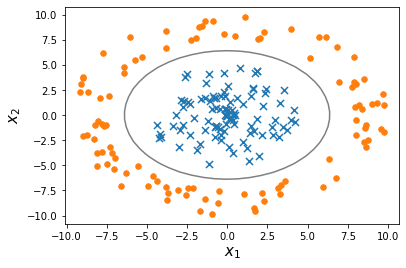

In [18]:
plt.scatter(X1nl[:, 0], X1nl[:, 1], s=50, marker="x")
plt.scatter(X2nl[:, 0], X2nl[:, 1], s=30)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel(), (np.power(XX,2) + np.power(YY,2)).ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5,
           linestyles=['-'])

plt.xlabel('$x_1$', fontsize=15)
plt.ylabel('$x_2$', fontsize=15)

plt.show()

By introducing feature mapping, we have managed to classify a non-linear data. However, in practice, knowing the explicit mapping can be tricky, sometimes impossible. In addition, we will have to do dot product in the new feature space which can be computationally expensive if the dimension of the new feature space is much higher than the original. To deal with these problems, we can utilize the Kernel trick.

First, consider the following Lagrange function of the soft-margin SVM.

\begin{equation}
    \begin{aligned}
        L(w,b,\xi,\alpha, \beta) = \frac{1}{2}\|w\|^2 + C\sum\limits_{i=1}^n\xi_i + \sum\limits_{i=1}^n\alpha_i(1-\xi_i -y^i(w^Tx^i+b)) + \sum\limits_{i=1}^n\beta_i(-\xi_i)
    \end{aligned}
\end{equation}

Then we have

\begin{equation}
    \sup\limits_{\alpha,\beta\geq 0} L(w,b,\xi,\alpha,\beta) = \begin{cases}
    \frac{1}{2}\|w\|^2 + C\sum\limits_{i=1}^n\xi_i & \text{if $w,b,\xi$ satisfies the constraints} \\
    \infty &\text{otherwise}
    \end{cases}
\end{equation}

So we can reformulate soft-margin SVM as follows

\begin{equation}
    \begin{aligned}
        \min\limits_{w,b,\xi} &\sup\limits_{\alpha,\beta \geq 0} L(w,b,\xi,\alpha,\beta) \\
    \end{aligned}
\end{equation}

Its Lagrange dual can be obtained as follows:

\begin{equation}
    \begin{aligned}
        \max\limits_{\alpha} &\inf\limits_{w,b,\xi} L(w,b,\xi,\alpha,\beta) \\
        \text{s.t} \ & \alpha_i \geq 0  \ (i=1,\dots,n) \\ 
                     & \beta_i \geq 0  \ (i=1,\dots,n)
    \end{aligned}
\end{equation}

By the KKT conditions, we have:

$$
w = \sum\limits_{i=1}^n\alpha_iy^ix^i \\
\sum\limits_{i=1}^n\alpha_iy^i = 0 \\
C = \alpha_i + \beta_i \ (i=1,\dots,n)
$$

Using the above equalities, our Lagrange dual becomes

\begin{equation}
    \begin{aligned}
        \max\limits_{\alpha,\beta}\ &\sum\limits_{i=1}^n\alpha_i - \frac{1}{2}\sum\limits_{i=1}^n\sum\limits_{j=1}^n\alpha_i\alpha_jy^iy^j \langle x^i,x^j\rangle \\
        \text{s.t.} \ &0 \leq \alpha_i \leq C \ (i=1,\dots,n) \\
                      & \sum\limits_{i=1}^n\alpha_iy^i = 0 
    \end{aligned}
\end{equation}

with feature mapping $\phi$, we have

\begin{equation}
    \begin{aligned}
        \max\limits_{\alpha}\ &\sum\limits_{i=1}^n\alpha_i - \frac{1}{2}\sum\limits_{i=1}^n\sum\limits_{j=1}^n\alpha_i\alpha_jy^iy^j \langle \phi(x^i),\phi(x^j)\rangle \\
        \text{s.t.} \ &0 \leq \alpha_i \leq C \ (i=1,\dots,n) \\
                      & \sum\limits_{i=1}^n\alpha_iy^i = 0 
    \end{aligned}
\end{equation}

Note that we are dealing with the inner product of the mapping of the input data points and not the mapping themselves. Let $K:\mathbb{R}^m \times \mathbb{R}^m \rightarrow \mathbb{R}$ be a kernel function such that $K(x^i,x^j) = \langle \phi(x^i),\phi(x^j)\rangle$. If we have such function, then we can calculate the inner product in the new feature space without ever visiting it. Fortunately, in literatures, there are plenty of kernel functions for you to choose from. One of the most used kernel, the radial basis function (RBF) where $K(x^i,x^j) = \exp(-\gamma\|x^i-x^j\|^2)$, actually computes an inner product in an infinite dimensional space. That is why I mentioned that sometimes, it is impossible to get an explicit mapping. Note that, similar to $C$, $\gamma \in \mathbb{R}_{> 0}$ is also a regularization term (I also strongly recommend that you look up how a choice of $\gamma$ can affect RBF). Our soft-margin SVM with the kernel trick can be formulated as follows:

\begin{equation}
    \begin{aligned}
        \max\limits_{\alpha}\ &\sum\limits_{i=1}^n\alpha_i - \frac{1}{2}\sum\limits_{i=1}^n\sum\limits_{j=1}^n\alpha_i\alpha_jy^iy^j K(x^i,x^j) \\
        \text{s.t.} \ &0 \leq \alpha_i \leq C \ (i=1,\dots,n) \\
                      & \sum\limits_{i=1}^n\alpha_iy^i = 0 
    \end{aligned}
\end{equation}

To classify unseen data $x$, we use the following decision function

$$
f(x) = \text{sign}(\sum\limits_{i=1}^n\alpha_iy^iK(x^i,x) + b)
$$

where $b$ can be obtained by

$$
    b = y^j-\sum\limits_{i=1}^n\alpha_iy^iK(x^i,x^j)
$$

for any support vector $x^j$. Although in practice, we often average over all support vectors for numerical stability.

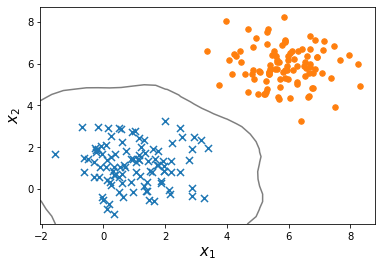

In [19]:
clf = SVC(C=1, kernel='rbf', gamma=1)
clf.fit(X, y)
plot_SVM(X1,X2)

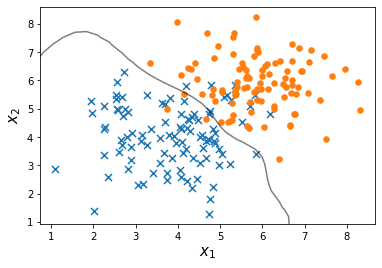

In [20]:
clf = SVC(C=1, kernel='rbf', gamma=1)
clf.fit(Xns, y)
plot_SVM(X1ns,X2)

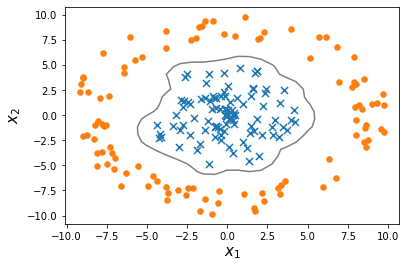

In [21]:
clf = SVC(C=1, kernel='rbf', gamma=1)
clf.fit(Xnl, y)
plot_SVM(X1nl,X2nl)

As you can see, using the RBF kernel, we managed to get a much more complicated decision boundary.

Next, we will go over some a dataset with SVM. We will be using the heart disease dataset on Kaggle. The aim is given some medical records, we want to be able to predict whether the patient has heart disease $(1)$ or not $(0)$.
